Рассмотрим задачу построения доверительного интервала для математического ожидания $m$ нормально распределенной случайной величины.

Дана выборка $x_1, x_2, \dots, x_n$ объема $n$ из генеральной совокупности, имеющей нормальное распределение. На ее основе  строим соответственно выборочное среднее и выборочное среднее квадратическое отклонение. 


Случайная величина
$
Т =	\sqrt{n - 1} \cdot \frac{\bar X - m}{S}, 
$ 
называемая статистикой Стьюдента, распределена в соответствии с распределением Стьюдента, с $n - 1$ степенями свободы. 


Положим $ 2 F_{T}(x) - 1 = 1 - \alpha$, где  $\alpha$ --- выбранный уровень значимости. 

Обозначим $t_{1 - \alpha/2}(n - 1)$ --- квантиль распределения Стьюдента с $n - 1$ степенями свободы порядка $1 - \alpha/2$. Из (\ref{e3_1_3b}) получаем:

$ 
\mathbb P( \bar X -  \frac{S t_{1 - \alpha/2}(n - 1)}{\sqrt{n - 1}} < m < \bar X +  \frac{S t_{1 - \alpha/2}(n - 1)}{\sqrt{n - 1}}) = 1 - \alpha, 
$ 
что, по определению, задает доверительный интервал для среднего значения $m$.


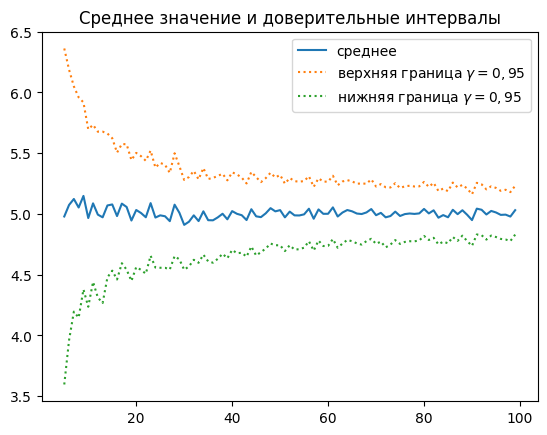

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
np.random.seed(seed=125)
x1 = []
l1 = []
nfin = 100
for st in range (5, nfin, 1):
    test1 = np.random.normal(5,1,20*st)
    x1.append(np.mean(test1))
    l1.append((np.std(test1)*t.interval(0.95,st - 1 )[1])/np.sqrt(st-1))
x2 = np.array(x1)
l2 = np.array(l1)
yl = x2 - l2
yu = x2 + l2
st = np.arange(5,nfin,1)
plt.plot(st,x2[st-5],label = 'среднее')
plt.plot(st,yu[st-5],':',label = r'верхняя граница $\gamma = 0,95$')
plt.plot(st,yl[st-5 ],':',label = r'нижняя граница $\gamma = 0,95$')
plt.legend()
plt.title('Среднее значение и доверительные интервалы')
plt.show()

Если задать более жесткий уровень значимости, например, положив $\alpha = 0.01$, то получаемые доверительные интервалы будут, естественно, более широкими. Представленный график наглядно иллюстрирует сформулированное свойство доверительных интервалов.

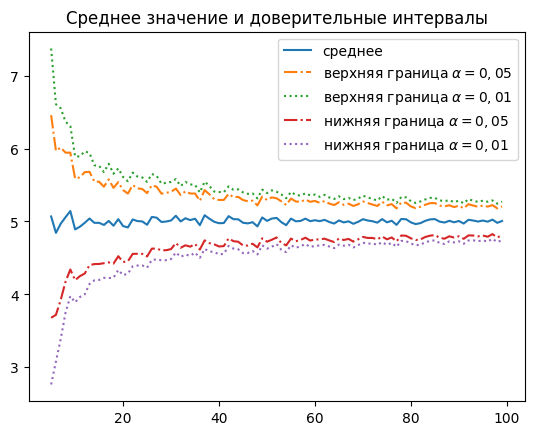

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
x1 = []
l1 = []
l2 = []
nfin = 100
for st in range (5, nfin, 1):
    test1 = np.random.normal(5,1,20*st)
    x1.append(np.mean(test1))
    l1.append((np.std(test1)*t.interval(0.95,st - 1 )[1])/np.sqrt(st-1))
    l2.append((np.std(test1)*t.interval(0.99,st - 1 )[1])/np.sqrt(st-1))
x2 = np.array(x1)
l1a = np.array(l1)
l2a = np.array(l2)
yl_095 = x2 - l1a
yl_099 = x2 - l2a
yu_095 = x2 + l1a
yu_099 = x2 + l2a
st = np.arange(5,nfin,1)
plt.plot(st,x2[st-5],label = 'среднее')
plt.plot(st,yu_095[st-5],'-.',label = r'верхняя граница $\alpha = 0,05$')
plt.plot(st,yu_099[st-5],':',label = r'верхняя граница $\alpha = 0,01$')
plt.plot(st,yl_095[st-5 ],'-.',label = r'нижняя граница $\alpha = 0,05$')
plt.plot(st,yl_099[st-5 ],':',label = r'нижняя граница $\alpha = 0,01$')
plt.legend()
plt.title('Среднее значение и доверительные интервалы')
plt.show()